#KNN Classification For Hand Written Digits

In [ ]:
#import package to handle maths and arrays
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# importing a module for splitting a dataset into train, and test
from sklearn.model_selection import train_test_split
# import Knn classifier
from sklearn.neighbors import KNeighborsClassifier
# confusion metric
from sklearn import metrics
import seaborn as sns

## Mounting the google drive to Access Data

In [ ]:
#mount the google drive to access the data 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change the directory to the folder with the data
%cd /content/gdrive/MyDrive/Deep_learning/Assignment_1

/content/gdrive/MyDrive/Deep_learning/Assignment_1


##Importing and Loading The Data

In [ ]:
#import the data and download it into your directory
#if this has been ran before select n to not overide the data
!curl -O 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
!gunzip t*-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file train-images-idx3-ubyte.gz: Input/output 
  0 9680k    0 31389    0     0   4946      0  0:33:24  0:00:06  0:33:18  4945
curl: (23) Failed writing body (0 != 16384)
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
#split the data into train data, labels for training data, testing data and labels for testing data
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    X_train, X_labels = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

else:
    X_train, X_labels = loadlocal_mnist(
            images_path='train-images.idx3-ubyte', 
            labels_path='train-labels.idx1-ubyte')

if not platform.system() == 'Windows':
    Y_test, Y_labels = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

else:
    Y_test, Y_labels = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

In [ ]:
#check the dimensions of the data to ensure they have been correctly split and assigned to an array
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

In [ ]:
#print and save the labels into into X_labels for the training data
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(X_labels))
print('Class distribution: %s' % np.bincount(X_labels))
#check the shape of the training and testing data to ensure the splitting of data was done correctly
print(np.shape(X_train))
print(np.shape(Y_test))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
(60000, 784)
(10000, 784)


##Initial Reshaping

In [ ]:
#reshape the raw data into a 28x28 array of pixels
#this is needed for data visualization
X_train=X_train.reshape(-1,28,28)
Y_test=Y_test.reshape(-1,28,28)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


##Visualizing the Data

4
0
5
3


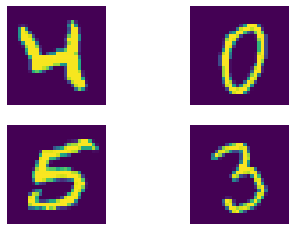

In [ ]:
#Display samples of the training data with its correlating labels
#using plt.figure to plot the images in a 2x2 block
img_index = 20
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

## Histogram-of-Oriented Gradient (HOG) feature extraction

In [ ]:
#import skimage to use feature extraction
from skimage import feature
#initialise the lists needed to store the HOG feature data
hog_train_data = []
hog_train_labels = []
hog_test_data = []
hog_test_labels = []
hog_images_train = []
hog_images_test = []

In [ ]:
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
  image = X_train[img_index]
  
  #use orientation =9, pixel_per_cell=(10,10), cells_per_block=2,2, 
  # transform_sqrt=True and block_norm="L2-Hys"
  hog, hog_image = feature.hog(image, orientations= 9, pixels_per_cell=(10,10), cells_per_block=(2,2), visualize=True, transform_sqrt=True, block_norm = 'L2-Hys') 
 
  # update the data and labels
  hog_train_data.append(hog)  
  hog_train_labels.append(X_labels[img_index]) 
  hog_images_train.append(hog_image) 

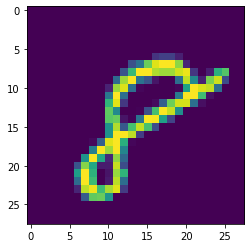

In [ ]:
#show a sample of the data before HOG extraction
plt.imshow(X_train[img_index])

(28, 28)


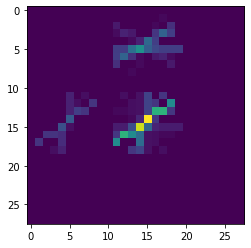

In [ ]:
#show a the same data sample after it has undergone feature extraction
print(np.shape(hog_image))
plt.imshow(hog_images_train[img_index])

In [ ]:
#do the same feature extraction for the training data
for img_index_2 in range(len(Y_test)):
  # load the image, and extract HOG features it
    image = Y_test[img_index_2]
  
  # use orientation =9, pixel_per_cell=(10,10), cells_per_block=2,2, 
  # transform_sqrt=True and block_norm="L2-Hys"
  hog, hog_image_test = feature.hog(image, orientations= 9, pixels_per_cell=(10,10), cells_per_block=(2,2), visualize=True, transform_sqrt=True, block_norm = 'L2-Hys')
  
  # update the data and labels
  hog_test_data.append(hog)  
  hog_test_labels.append(Y_labels[img_index_2]) 
  hog_images_test.append(hog_image_test)  

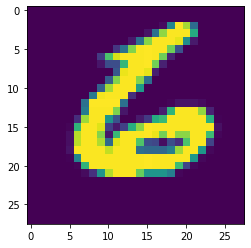

In [ ]:
#show a sample of the data before HOG extraction
plt.imshow(Y_test[img_index_2])

(28, 28)


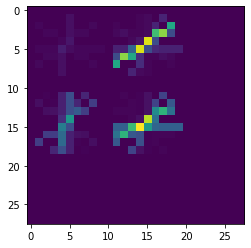

In [ ]:
#show the same data sample after it has undergone feature extraction
print(np.shape(hog_image_test))
plt.imshow(hog_images_test[img_index_2])

In [ ]:
#Check how the HOG feature extraction changed the shape of the data
print(np.shape(hog_train_data))
print(np.shape(hog_train_labels))
print(np.shape(hog_test_data))
print(np.shape(hog_test_labels))

(60000, 36)
(60000,)
(10000, 36)
(10000,)


##Reshaping For KNN

In [ ]:
#reshape the data so it can be correctly inputted into the KNN
#change the 28x28 array into a 784 1D vector
X_train= np.reshape(X_train, (X_train.shape[0], -1))
Y_test = np.reshape(Y_test, (Y_test.shape[0], -1))

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

Train dataset after reshaping:(60000, 784)
Test dataset after reshaping :(10000, 784)


##Creating the KNN For Raw Data

In [ ]:
#Desing a KNN classifier with a nearest neighbour of 3
clf=KNeighborsClassifier(n_neighbors=3)

In [ ]:
#fit the raw training data to the model
clf.fit(X_train, X_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#calculate the accuracy of the KNN on the raw training data
acc_train = clf.score(X_train,X_labels)
print('Train set accuracy: ', acc_train)

Train set accuracy:  0.9867166666666667


In [ ]:
#calculate the accuracy of the KNN on the raw testing data
acc_test = clf.score(Y_test,Y_labels)
print('Test set accuracy: ', acc_test)

Test set accuracy:  0.9705


##Creating the KNN For HOG Data

In [ ]:
#create a new model to test the KNN on the HOG data
#parameters stay the same
clf2=KNeighborsClassifier(n_neighbors=3)

In [ ]:
#fit the HOG data to the KNN 
clf2.fit(hog_train_data, hog_train_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#calculate the accuracy of the KNN on the HOG training data
acc_train_2 = clf2.score(hog_train_data, hog_train_labels)
print('Train set accuracy: ', acc_train_2)

Train set accuracy:  0.9252


In [ ]:
#calculate the accuracy of the KNN on the HOG testing data
acc_test_2 = clf2.score(hog_test_data,hog_test_labels)
print('Test set accuracy: ', acc_test_2)

Test set accuracy:  0.8676


##Evaluation of Model

In [ ]:
#Arrays for predicted results incase the evaluation requires arrays to be passed in
predict_test =[]
predict_label =[]

In [ ]:
#Method that takes in the test data and returns the labels predicted by the model
#The labels are stored in pred
pred = clf.predict(Y_test)
predict_test.append(pred)

In [ ]:
#Checking the shape of the prediction labels and data labels
print(np.shape(predict_test))
print(np.shape(Y_labels))

(1, 10000)
(10000,)


In [ ]:
#Create a confusion matrix taking in the true labels "Y_labels" and comparing them agains the predicted labels "pred"
cm  = metrics.confusion_matrix(Y_labels, pred)
print(cm)

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]


###Confusion Matrix For Raw Data

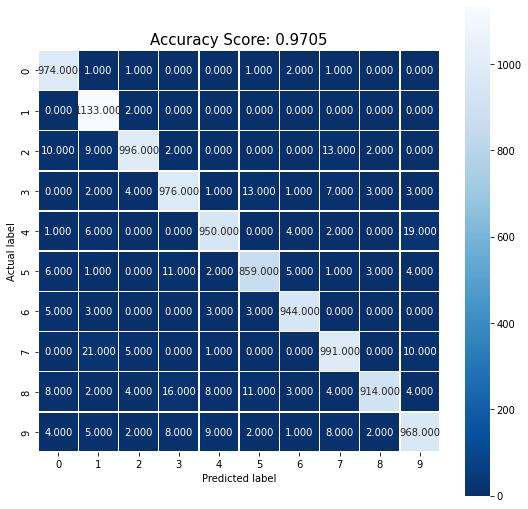

In [ ]:
#Using sns to make the confusion matrix more visibly pleasing
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test)
plt.title(all_sample_title, size = 15);

###Confusion Matrix For HOG Data

In [ ]:
#calculate the predicted labels for the HOG data
pred_Hog = clf2.predict(hog_test_data)

In [ ]:
#Create a confusion matrix taking in the true labels "hog_test_labels" and comparing them agains the predicted labels "pred"
cm_Hog  = metrics.confusion_matrix(hog_test_labels, pred_Hog)
print(cm_Hog)

[[ 904    5    6    2    1    5   20    2   17   18]
 [   5 1120    2    2    1    0    4    0    1    0]
 [  18    3  879   45    7    3    3   40   16   18]
 [   4    1   55  833    0   31    0   22   50   14]
 [   3    4   13    1  840    1  103    0    6   11]
 [   6    3   16   46    2  754   17    0   33   15]
 [  21    2    5    2   43   17  855    1    5    7]
 [  22    7   47   43    1    8    1  869    8   22]
 [  53    1   25   48    3   32   24    4  729   55]
 [  19    3    4   16    4   12   10    7   41  893]]


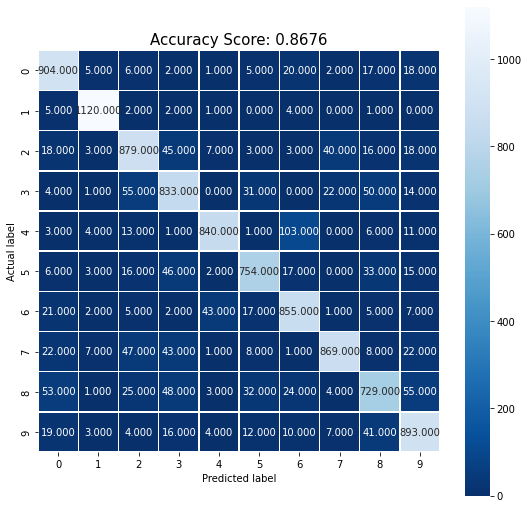

In [ ]:
#Using sns to make the confusion matrix more visibly pleasing
plt.figure(figsize=(9,9))
sns.heatmap(cm_Hog, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test_2)
plt.title(all_sample_title, size = 15);

##Displaying Classification Results

###Results For Raw Data

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)
2
1
0
4


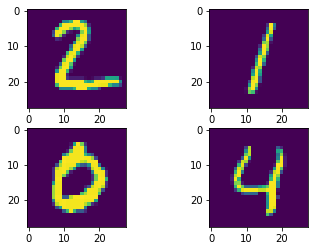

In [ ]:
#Reshape the data for visualization
X_train=X_train.reshape(-1,28,28)
Y_test=Y_test.reshape(-1,28,28)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

#Display sample images of the raw data and the predicted labels to test whether the model
#correctly predicted the hand written digits from the raw data
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Y_test[1])
print(pred[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Y_test[2])
print(pred[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(Y_test[3])
print(pred[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(Y_test[4])
print(pred[4])

###Results For HOG Data

2
1
0
4


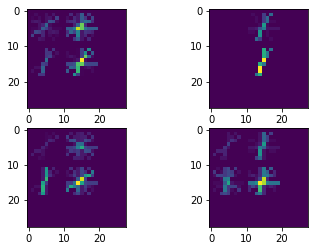

In [ ]:
#Display sample images of the HOG data and the predicted labels to test whether the model
#correctly predicted the hand written digits from the HOG data
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(hog_images_test[1])
print(pred_Hog[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(hog_images_test[2])
print(pred_Hog[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(hog_images_test[3])
print(pred_Hog[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(hog_images_test[4])
print(pred_Hog[4])